<a href="https://colab.research.google.com/github/Auditasari/Data-Analyst/blob/main/ProjectDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Data Analisis FGA Data Analyst Digital Talent Kominfo  **

---



FGA Digital Talent Kominfo 

---


Auditasari Damayanti Putri 

# **Perusahaan Cyclistic**

Pada tahun 2016 Cyclistic meluncurkan program penyewaan sepeda. Program ini terus berkembang hingga Cyclistic memiliki 5.824 armada yang tersebar di 692 stasiun di seluruh chicago. Sepeda ini dapat diakses dari satu stasiun dan dapat dikembalikan di stasiun lainnya dengan jangka waktu yang tidak dibatasi. 

Cyclistic membedakan diri dari perusahaan lain dengan juga menawarkan sepeda reclining, hand tricycles, dan sepeda kargo, menjadikan bike-share lebih inklusif bagi penyandang disabilitas dan pengendara yang tidak dapat menggunakan sepeda roda dua standar. Mayoritas pengendara memilih sepeda tradisional; sekitar 8% pengendara menggunakan opsi bantuan. Pengguna sepeda lebih cenderung bersepeda untuk bersantai, tetapi sekitar 30% menggunakannya untuk bepergian ke tempat kerja setiap hari.

Salah satu trategi pemasaran Cyclistic adalah fleksibilitas harga yaitu tiket sekali jalan, tiket sehari penuh, dan keanggotaan tahunan. Pelanggan yang membeli tiket sekali jalan atau tiket sehari penuh disebut sebagai pengendara casual. Pelanggan yang membeli keanggotaan tahunan adalah member Cyclistic.

Analis keuangan Cyclistic telah menyimpulkan bahwa anggota tahunan jauh lebih menguntungkan dibandingkan pengendara biasa. Meskipun fleksibilitas harga membantu Cyclistic menarik lebih banyak pelanggan, Moreno percaya bahwa memaksimalkan jumlah anggota tahunan akan menjadi kunci pertumbuhan di masa depan. Moreno telah menetapkan tujuan yang jelas yaitu Merancang strategi pemasaran yang bertujuan untuk mengubah pengendara biasa menjadi anggota tahunan.

##Pemangku Kepentingan 
●	Lily Moreno: Direktur pemasaran dan manajer

●	Tim analitik pemasaran Cyclistic: Sebuah tim analis data yang bertanggung jawab untuk mengumpulkan, menganalisis, dan melaporkan data yang membantu memandu strategi pemasaran Cyclistic

●	Tim eksekutif Cyclistic: Tim eksekutif yang sangat berorientasi pada detail akan memutuskan apakah mereka menyetujui program pemasaran yang direkomendasikan.
 


##Analisis Data Cyclistic 
Langkah 1 : Bertanya 

1.  Bagaimana trend pengguna Cyclistic?
2.  Bagaimana Pengendara dapat memutuskan untuk menjadi anggota tahunan?
3.  Bagaimana Cyclistic mempengaruhi pengguna untuk menjadi anggota tahunan dengan mengunakan media sosial?


Langkah 2 : Mempersiapkan 

*   Data Perjalanan history Cyclistic
*   Sumber Data : Motivate International Inc
*   Lisensi : https://ride.divvybikes.com/data-license-agreement















Langkah 3: Memperoses


1. Menggunakan Google Colab dengan runtime R   
2. Menginstall packages yang  dibutuhkan 
3. Membuka library packages 


 

In [ ]:
# Menginstal packages 
install.packages("googledrive")
install.packages("readr")
install.packages("tidyverse")
install.packages("dplyr")
install.packages("lubridate")
install.packages("hms")
install.packages("httpuv")
install.packages("purrr")
# Membuka library
library("googledrive")
library("readr")
library("tidyverse")
library("dplyr")
library("lubridate")
library("hms")
library("httpuv")
library("purrr")

4. Mengatur google colab untuk terkoneksi dengan google drive



In [ ]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")){#may update python version 
# occasionally
install.packages("R.utils")
install.packages("httr")
library("R.utils")
library("httr")
my_check <- function() {return(TRUE)}
reassignInPackage("is_interactive", pkgName = "httr", my_check)
options(rlang_interactive=TRUE)
}

In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AfgeXvvMeUXJJeWVni_ecFluzRA2N2_iVUUcWzIITw-vIOBCREAQAKq7SYM


In [4]:
folder_url <- "https://drive.google.com/drive/u/1/folders/1lwO0Ybd3ZvAqcLA4xnLFMelPviKQ1U-L"
folder <- drive_get (as_id(folder_url))
csv_files <- drive_ls(folder, type = "csv")

5. Mendownload data dari Google drive


In [ ]:
walk(csv_files$id, ~drive_download(as_id(.x)))

6. Membaca file csv dengan packages readr


In [6]:
#membaca data csv 
data_jan <- read.csv("202101-divvy-tripdata.csv")
data_feb <- read.csv("202102-divvy-tripdata.csv")
data_mar <- read.csv("202103-divvy-tripdata.csv")
data_apr <- read.csv("202104-divvy-tripdata.csv")
data_mei <- read.csv("202105-divvy-tripdata.csv")
data_jun<- read.csv("202106-divvy-tripdata.csv")
data_jul <- read.csv("202107-divvy-tripdata.csv")
data_ags <- read.csv("202108-divvy-tripdata.csv")
data_sep <- read.csv("202109-divvy-tripdata.csv")
data_okt <- read.csv("202110-divvy-tripdata.csv")
data_nov <- read.csv("202111-divvy-tripdata.csv")
data_des <- read.csv("202112-divvy-tripdata.csv")

7. Transformasi data: 


*   Menyatukan data 
*   Memilih data yang ingin di analisis
*   Melakukan pembersihan data 



In [7]:
#menyatukan data 
data_2021 <- bind_rows(data_jan,data_feb,data_mar,data_apr,data_mei,data_jun,data_jul,data_ags,data_sep,data_okt,data_nov,data_des)
data_2021 <- as_tibble(data_2021)
glimpse(data_2021)

Rows: 5,595,063
Columns: 13
$ ride_id            <chr> "E19E6F1B8D4C42ED", "DC88F20C2C55F27F", "EC45C94683…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-01-23 16:14:19", "2021-01-27 18:43:08", "2021…
$ ended_at           <chr> "2021-01-23 16:24:44", "2021-01-27 18:47:12", "2021…
$ start_station_name <chr> "California Ave & Cortez St", "California Ave & Cor…
$ start_station_id   <chr> "17660", "17660", "17660", "17660", "17660", "17660…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "Wood St & Augu…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "657", "13258",…
$ start_lat          <dbl> 41.90034, 41.90033, 41.90031, 41.90040, 41.90033, 4…
$ start_lng          <dbl> -87.69674, -87.69671, -87.69664, -87.69666, -87.696…
$ end_lat            <dbl> 41.89000, 41.90000, 41.90000, 41.92000, 41.90000, 4…
$ end_lng            <dbl> -87.72000, -87.69000, -87.70000, -87.69000, -87.700…
$ member_cas

In [8]:
#menghilangkan kolom yang tidak ingin digunakan 
data_2021 <- select(data_2021, -6:-12)


In [9]:
#mencari missing value dan data duplikat
sum(is.na(data_2021))
sum(duplicated(data_2021))

[1] 0

[1] 0

In [10]:
#menghilangkan error pada data 
sum(data_2021$ended_at < data_2021$started_at)
data_2021 <- filter(data_2021,data_2021$ended_at > data_2021$started_at)

[1] 147

In [11]:
#terdapat data yang error sebanyak 147 
#menghilangkan data error
sum(data_2021$ended_at < data_2021$started_at)

[1] 0

In [ ]:
#menggati nama kolom 
data_2021 <- rename(data_2021,bike_type=rideable_type, started = started_at, 
       ended = ended_at,customer_type=member_casual)


In [14]:
#memisahkan kolom waktu 
data_2021$started <- as_datetime(data_2021$started, format ='%Y-%m-%d %H:%M:%S')
data_2021$ended <- as_datetime(data_2021$ended, format ='%Y-%m-%d %H:%M:%S')
data_2021$ duration <- as_hms(difftime(data_2021$ended,data_2021$started))
data_2021 <-separate(data_2021,col = started,into = c('date','time'), sep = " ")
data_2021$date <- as.Date(data_2021$date)
data_2021$time <- as_hms(data_2021$time)


In [15]:
#membuat bulanan,mingguan dan jam
data_2021$month <- lubridate::month(data_2021$date, label = TRUE)
data_2021$weekday <- lubridate::wday(data_2021$date, label = TRUE)
data_2021$hour <- hour(data_2021$time)

Langkah 4: Analisis 


*   Membagi data untuk di analisis 
*   Melihat trend pada data 

Langkah 5: Membagikan 

*   Membuat Visualisasi






In [16]:
# Menginstall packages untuk visualisai 
install.packages("repr")
install.packages("scales")
# Membuka library 
library("repr")
library("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [ ]:
#menginstall packages untuk visualisasi theme 
system('sudo apt install libcairo2-dev')
install.packages('hrbrthemes')
library(hrbrthemes)


In [18]:
# Menganalisis Jumlah Konsumen 
data_member <- data_2021 %>%
  select(customer_type)%>%
  group_by(customer_type)%>%
  count()

print(data_member)

# A tibble: 2 × 2
# Groups:   customer_type [2]
  customer_type       n
  <chr>           <int>
1 casual        2528664
2 member        3065746


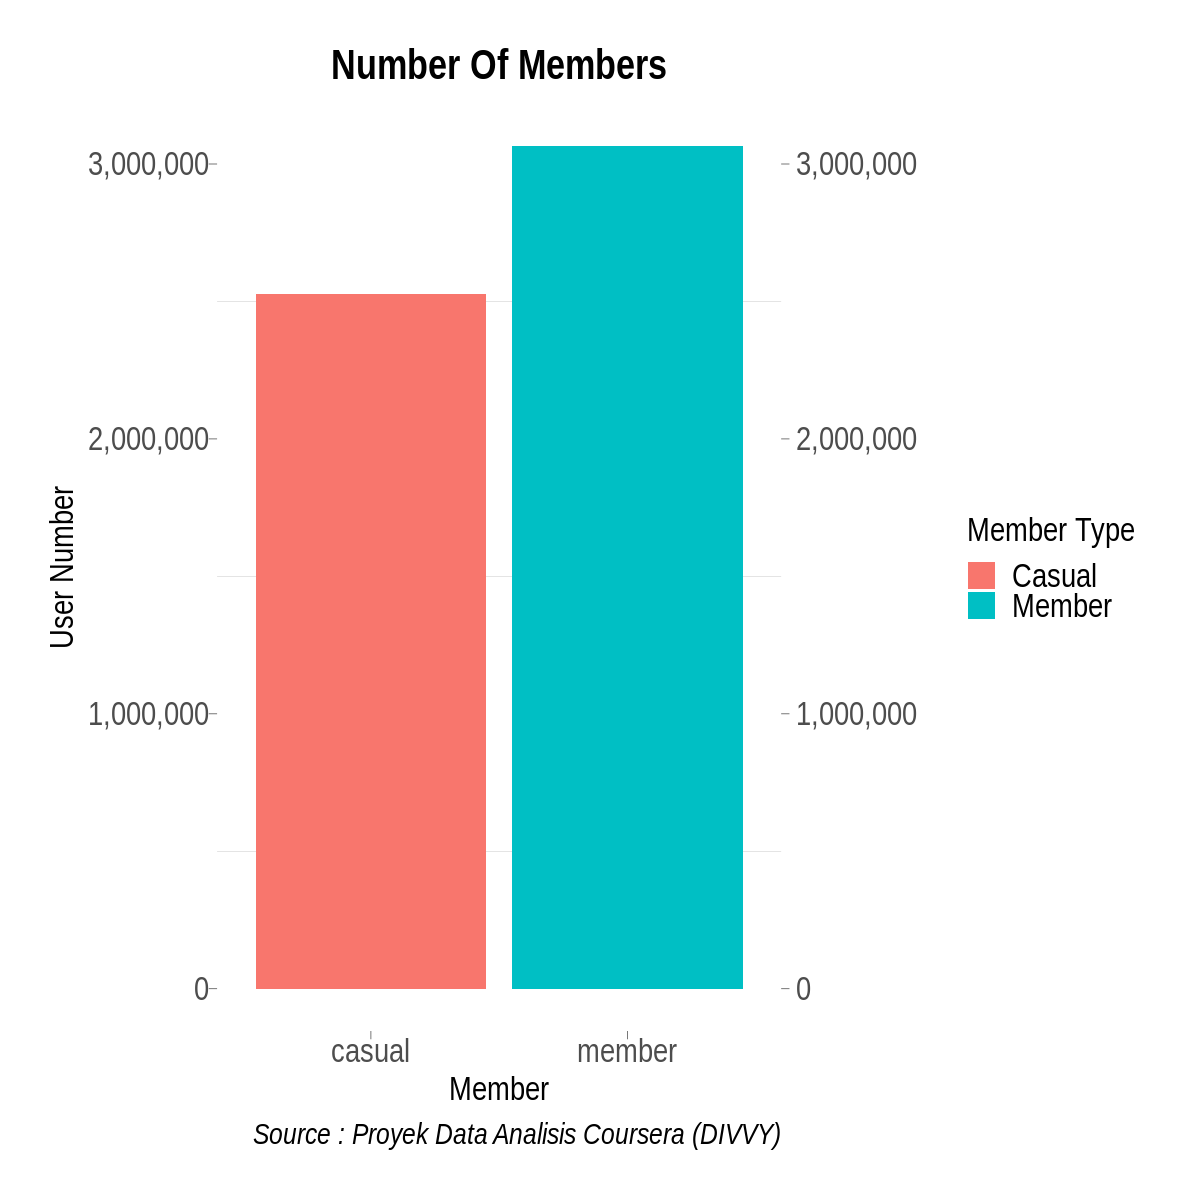

In [19]:
# Membuat Plot Jumlah Konsumen
plot_member <-  
  options(repr.plot.width = 10, repr.plot.height = 10)
  ggplot(data_member, aes(x=customer_type,y= n,fill = customer_type))+
  geom_col()+
  scale_y_continuous(sec.axis = dup_axis(name = NULL),
labels=comma)+
  scale_color_manual(values = c(
    "casual" = "red",
    "member" ="green"),
    labels= c("Casual","Member"))+
    scale_fill_discrete(name = "Member Type", labels = c("Casual","Member"))+
  labs(
    x = "Member",
    y = "User Number",
    colour = NULL,
    title = "Number Of Members",
    caption = "Source : Proyek Data Analisis Coursera (DIVVY)"
  )+
  theme_minimal()+
  theme_ipsum(
    base_size = 20,
    plot_title_size = 25,
    grid = "y",
    ticks = TRUE
  )+
  theme(
    plot.title = element_text(hjust = 0.5),
    legend.position = "right",
    axis.title.x = element_text(size=20, hjust = 0.5),
    axis.title.y = element_text(size=20, hjust = 0.5),
    plot.caption = element_text(size = 18),
    legend.text = element_text(size = 20)
  )

In [21]:
# Menganalisis Data Bulanan
data_monthly <- data_2021 %>%
  select(month,customer_type) %>%
  group_by(month,customer_type) %>%
  count()%>%
  arrange()


Warning message in geom_col(stat = "identity", position = position_dodge()):
“Ignoring unknown parameters: `stat`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


$repr.plot.width
[1] 10

$repr.plot.height
[1] 10



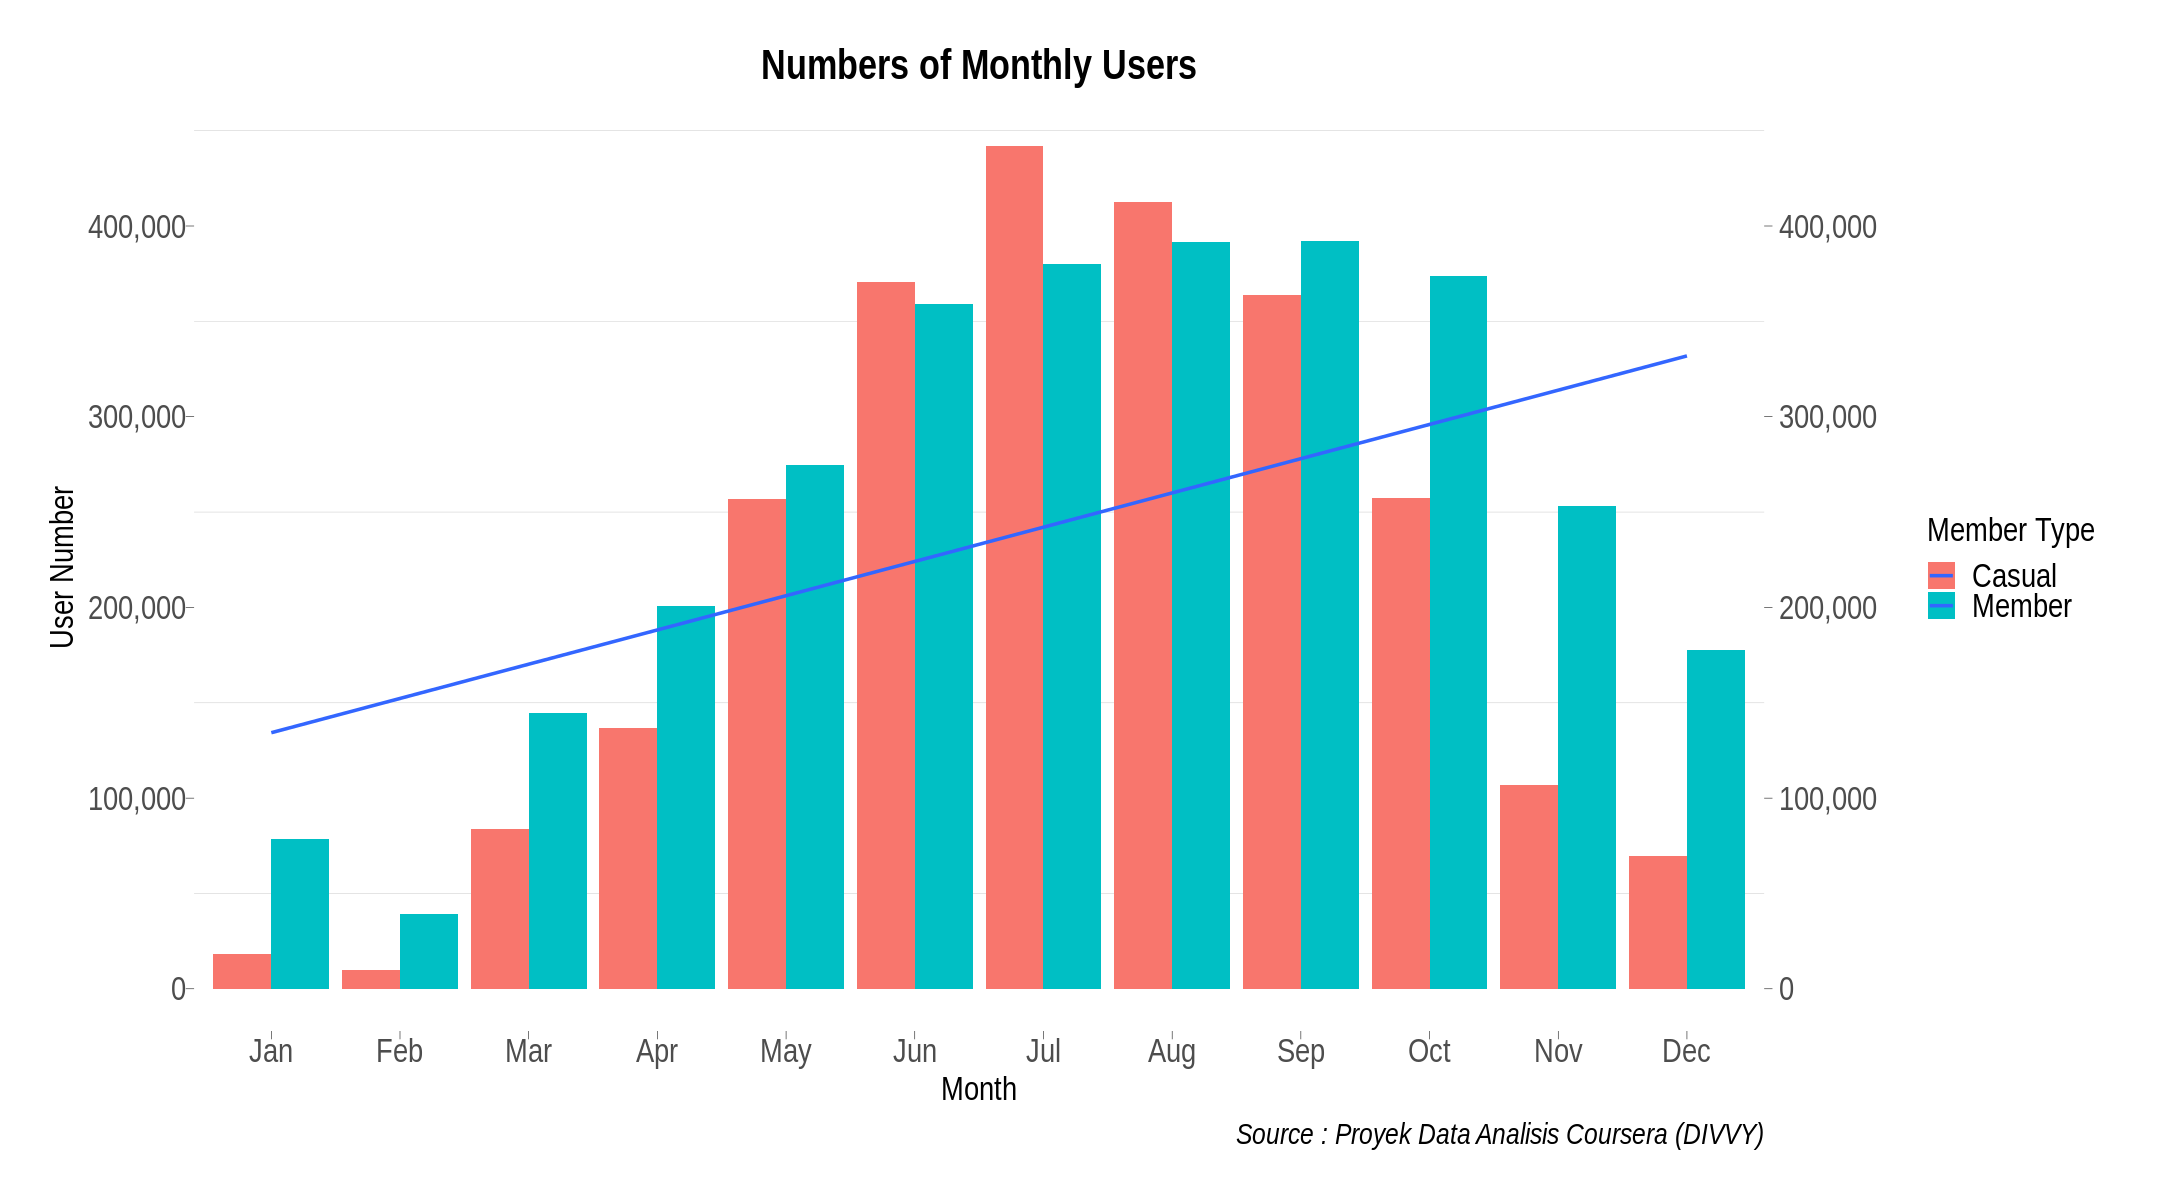

In [22]:
# Membuat visualisai data bulanan
  plot_monthly <-
  options(repr.plot.width = 18, repr.plot.height = 10)
  ggplot(data_monthly, aes(x=month,y= n,fill = customer_type))+
  geom_col(stat = "identity", position = position_dodge())+
  geom_smooth(aes(group= 1), method = "lm", se = FALSE)+
  scale_y_continuous(sec.axis = dup_axis(name = NULL),
labels=comma)+
  scale_color_manual(values = c(
    "casual" = "red",
    "member" ="green"),
    labels= c("Casual","Member"))+
    scale_fill_discrete(name = "Member Type", labels = c("Casual","Member"))+
  labs(
    x = "Month",
    y = "User Number",
    colour = NULL,
    title = "Numbers of Monthly Users",
    caption = "Source : Proyek Data Analisis Coursera (DIVVY)"
  )+
  theme_minimal()+
  theme_ipsum(
    base_size = 20,
    plot_title_size = 25,
    grid = "y",
    ticks = TRUE
  )+
  theme(
    plot.title = element_text(hjust = 0.5),
    legend.position = "right",
    axis.title.x = element_text(size=20, hjust = 0.5),
    axis.title.y = element_text(size=20, hjust = 0.5),
    plot.caption = element_text(size = 18),
    legend.text = element_text(size = 20)
  )
print(plot_monthly)

In [23]:
# Menganalisis Data Mingguan 
data_weekly <- data_2021 %>%
  select(weekday,customer_type)%>%
  group_by(weekday,customer_type)%>%
  count()%>%
  arrange()

$repr.plot.width
[1] 18

$repr.plot.height
[1] 10



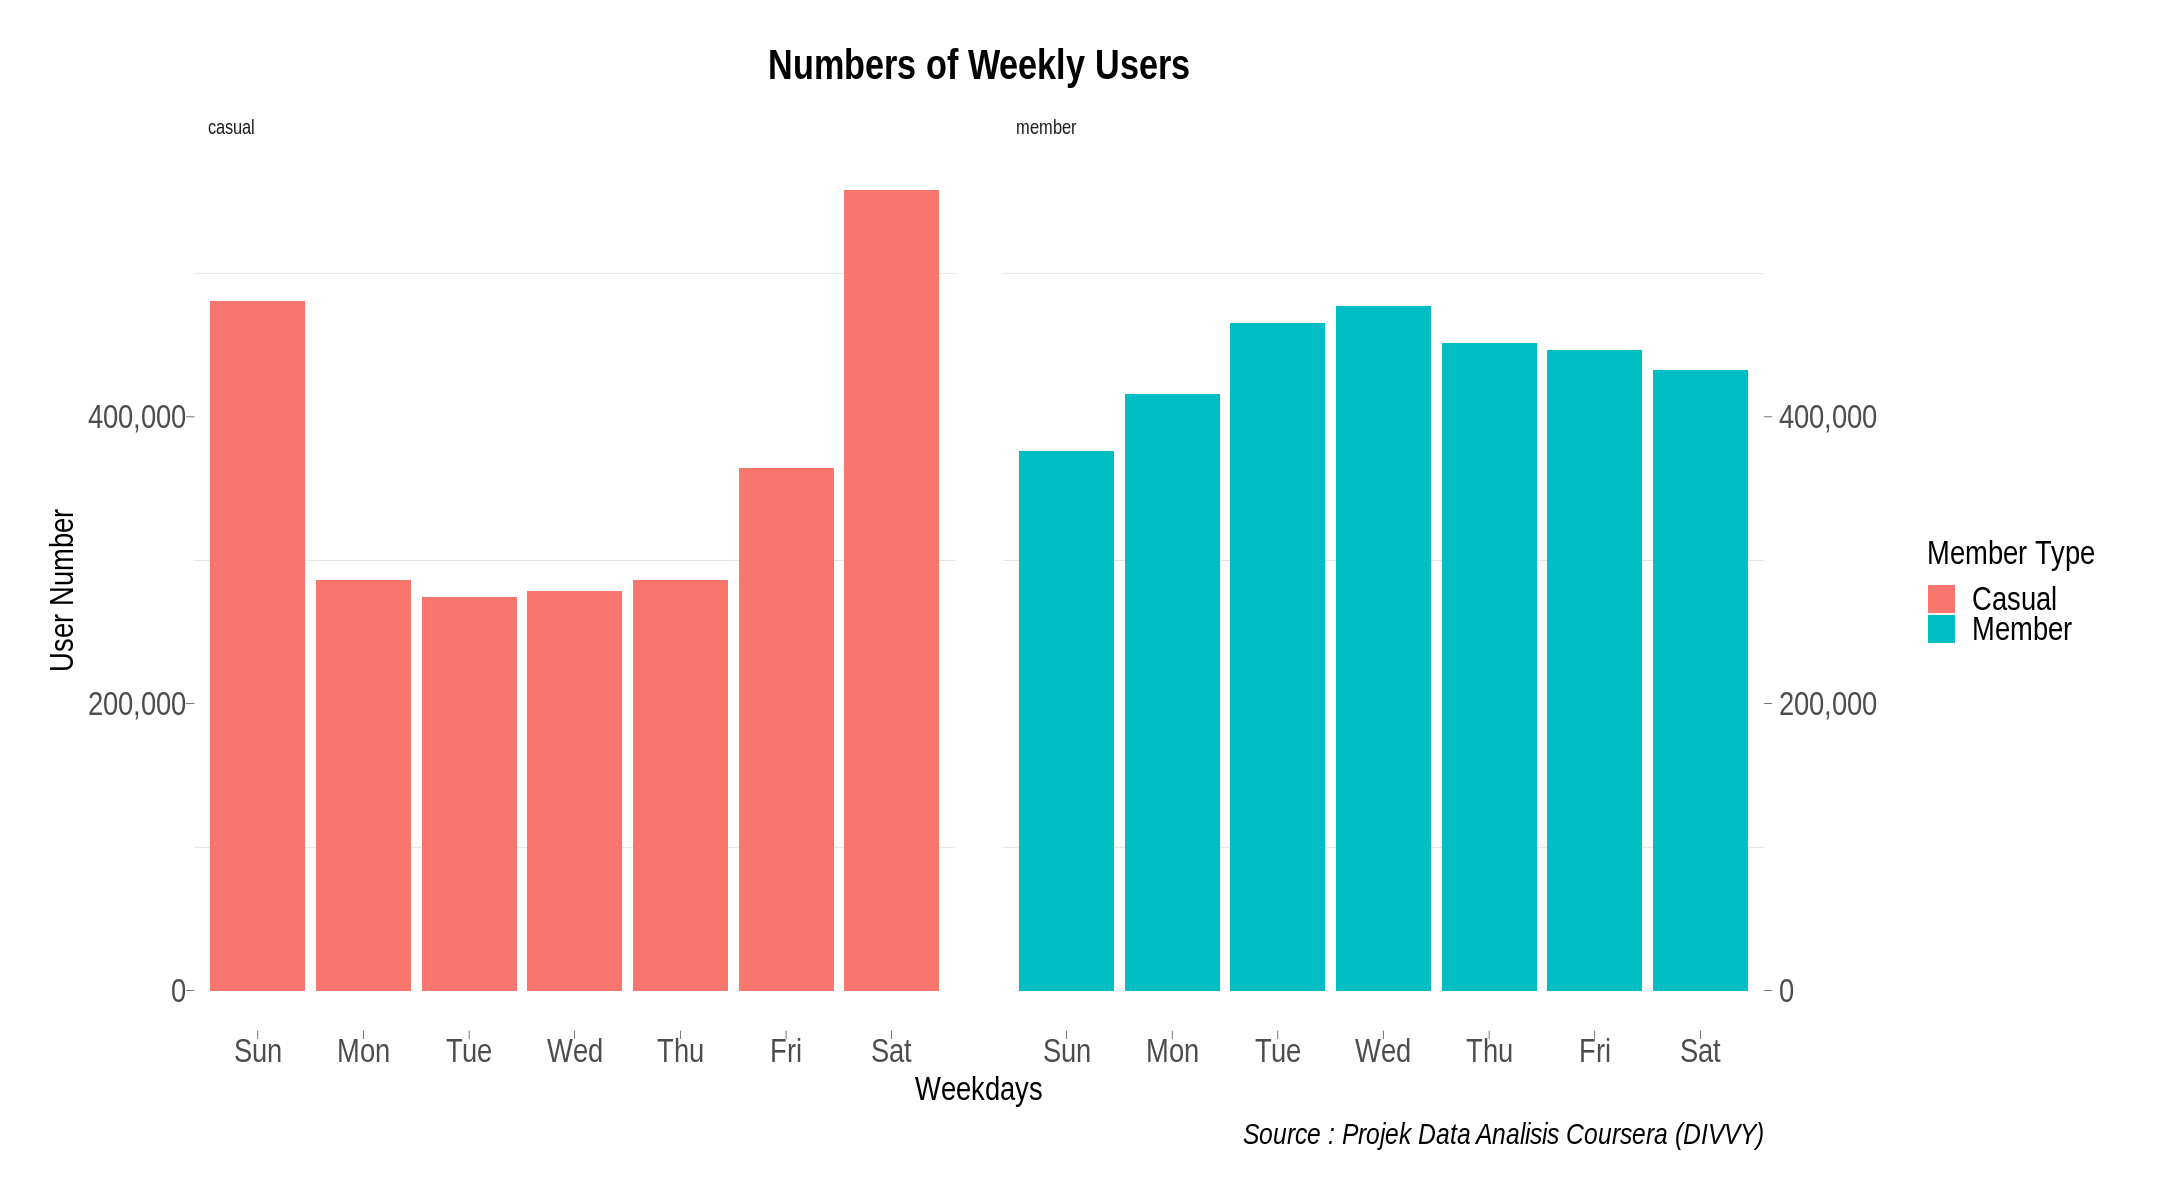

In [24]:
# Membuat Visualisasi Data Mingguan 
plot_weekly <-
options(repr.plot.width = 18, repr.plot.height = 10)
  ggplot(data_weekly, aes(x= weekday,y= n,fill = customer_type))+
  geom_col()+
  scale_y_continuous(sec.axis = dup_axis(name = NULL),
labels=comma)+
  scale_color_manual(values = c(
    "casual" = "red",
    "member" ="green"),
    labels= c("Casual","Member"))+
    scale_fill_discrete(name = "Member Type", labels = c("Casual","Member"))+
  labs(
    x = "Weekdays",
    y = "User Number",
    colour = NULL,
    title = "Numbers of Weekly Users",
    caption = "Source : Projek Data Analisis Coursera (DIVVY)"
  )+
  theme_minimal()+
  theme_ipsum(
    base_size = 20,
    plot_title_size = 25,
    grid = "y",
    ticks = TRUE
  )+
  theme(
    plot.title = element_text(hjust = 0.5),
    legend.position = "right",
    axis.title.x = element_text(size=20, hjust = 0.5),
    axis.title.y = element_text(size=20, hjust = 0.5),
    plot.caption = element_text(size = 18),
    legend.text = element_text(size = 20)  
  )+
    facet_wrap(~customer_type)
print(plot_weekly)

In [25]:
# Menganalisis Data Waktu
data_2021$hour <- hour(data_2021$time)
data_2021$hour <- as.character(data_2021$hour)
data_time <- data_2021 %>%
  select(hour,weekday,customer_type)%>%
  group_by(hour,weekday,customer_type)%>%
  count()%>%
  arrange()



$repr.plot.width
[1] 18

$repr.plot.height
[1] 8



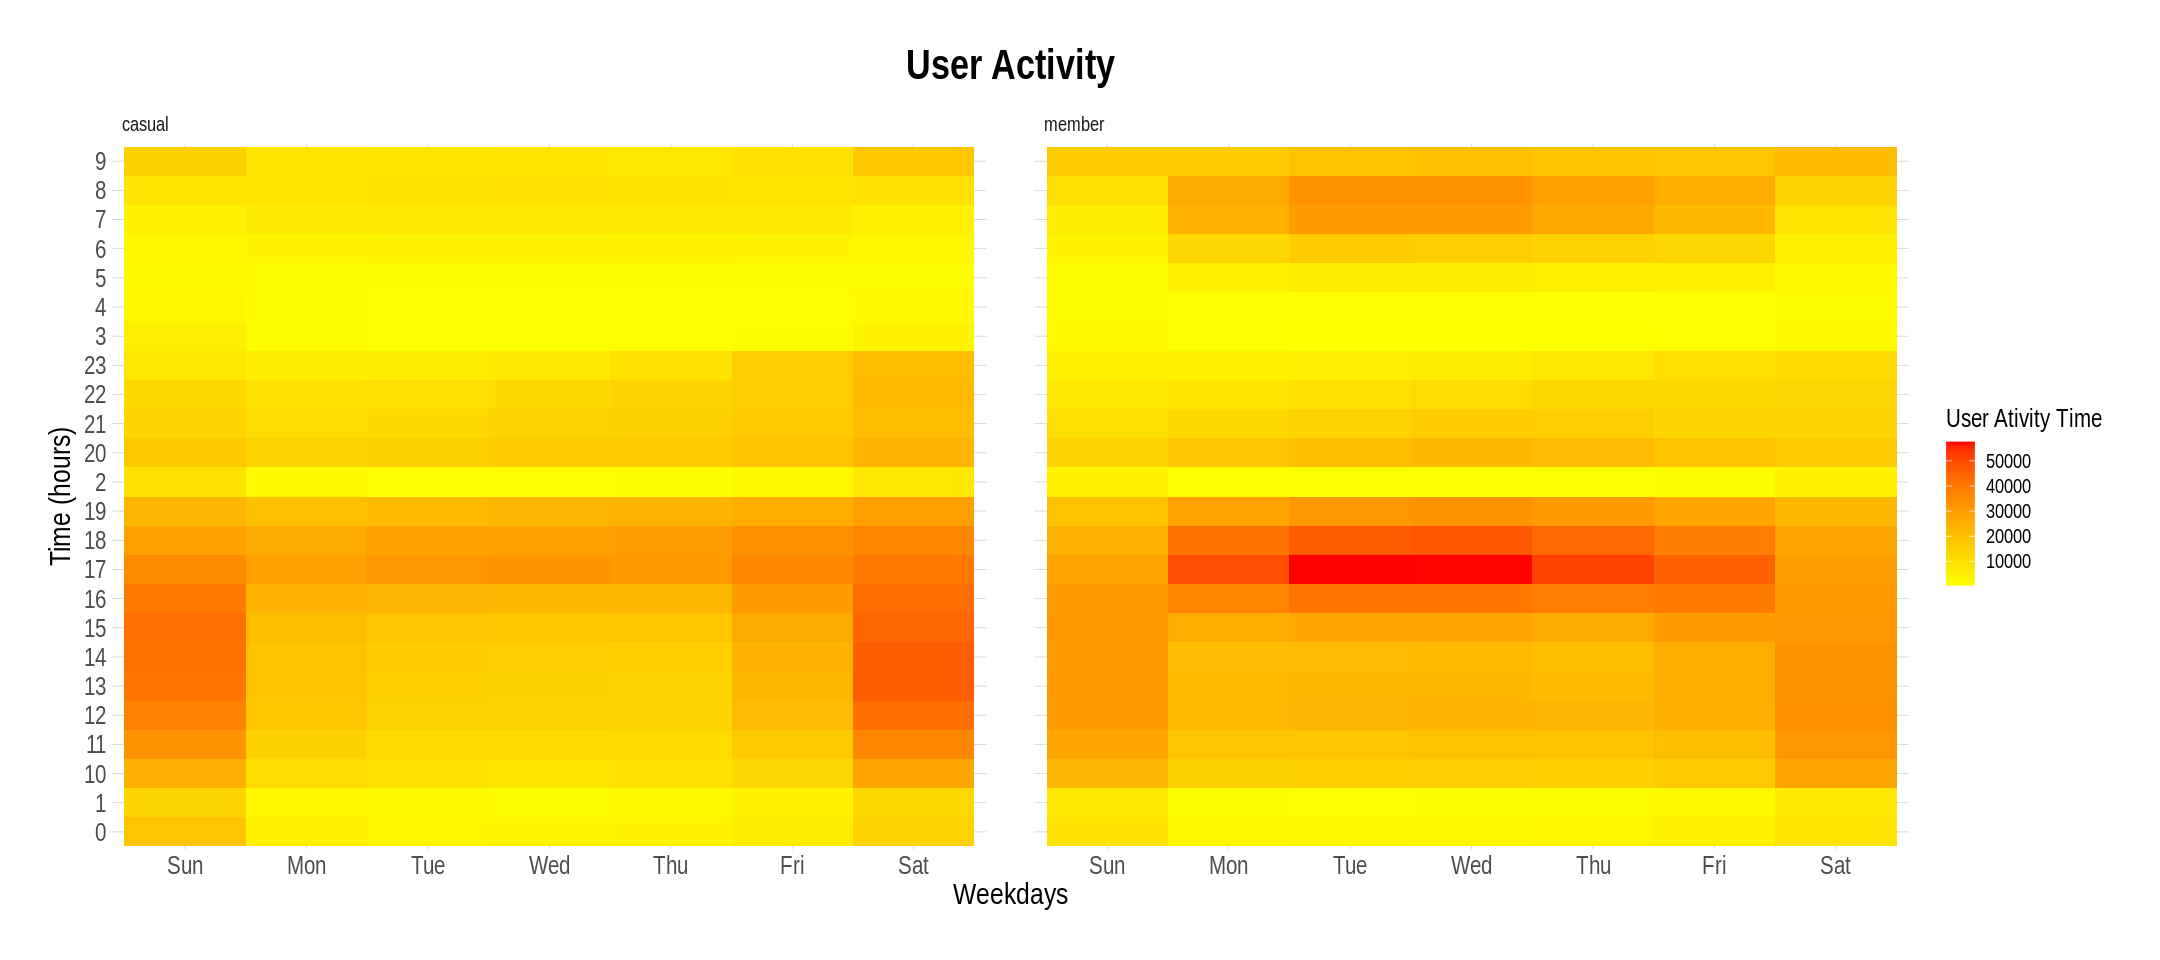

In [38]:
# Visualisasi Data Waktu
plot_time <-
  options(repr.plot.width = 18, repr.plot.height = 8)
  ggplot(data_time,aes(x = weekday, y = hour))+
    geom_tile(aes(fill = n))+
    scale_fill_gradient(low = "yellow", high = "red")+
    theme_light()+
    labs(
    title = "User Activity", 
    x = "Weekdays",
    y = "Time (hours)",
    fill = "User Ativity Time"
    )+
      theme_ipsum(
      base_size = 15,
      plot_title_size = 25
      )+
        theme(
        plot.title = element_text(hjust = 0.5),
        axis.title.x = element_text (size = 18, hjust = 0.5),
        axis.title.y = element_text( size = 18, hjust = 0.5)
        )+
    facet_wrap(~customer_type)
  
print(plot_time)

In [39]:
# Menganalisis Durasi Waktu Pengguna
data_duration_casual<- data_2021 %>%
  select(duration,customer_type)%>%
  filter(customer_type == "casual")

data_duration_casual$max <- which.max(data_duration_casual$duration)
data_duration_casual$min <- which.min(data_duration_casual$duration)
data_duration_casual$mean <- mean(data_duration_casual$duration)
data_duration_casual <- select(data_duration_casual,-1)
data_duration_casual <- slice(data_duration_casual, 1)

data_duration_casual$max <- seconds_to_period(data_duration_casual$max)
data_duration_casual$min <- seconds_to_period(data_duration_casual$min)
data_duration_casual$mean <- seconds_to_period(data_duration_casual$mean)

In [40]:
data_duration_member <- data_2021 %>%
  select(duration,customer_type)%>%
  filter(customer_type == "member")

data_duration_member$max <- which.max(data_duration_member$duration)
data_duration_member$min <- which.min(data_duration_member$duration)
data_duration_member$mean <- mean(data_duration_member$duration)
data_duration_member <- select(data_duration_member,-1)
data_duration_member <- slice(data_duration_member, 1)

data_duration_member$max <- seconds_to_period(data_duration_member$max)
data_duration_member$min <- seconds_to_period(data_duration_member$min)
data_duration_member$mean <- seconds_to_period(data_duration_member$mean)

In [41]:
# Menggabungkan Data dan Mengubah Nama Kolom Tabel Durasi
data_duration <- bind_rows(data_duration_casual,data_duration_member)
data_duration <- rename(data_duration, CustomerType = customer_type, Max = max, Min=min,Avarge=mean)

In [42]:
# Visualisasi Data Durasi 
data_duration

CustomerType,Max,Min,Avarge
<chr>,<Period>,<Period>,<Period>
casual,9d 7H 46M 46S,18M 17S,32M 0.34679696471926S
member,2d 0H 46M 24S,59M 49S,13M 38.0727088936924S


In [43]:
# Menganalisis Data Tipe Sepeda
data_bike <- data_2021 %>%
  select(bike_type,customer_type)%>%
  group_by(bike_type,customer_type)%>%
  count()%>%
  arrange()

Warning message in geom_col(stat = "indentity", position = position_dodge()):
“Ignoring unknown parameters: `stat`”


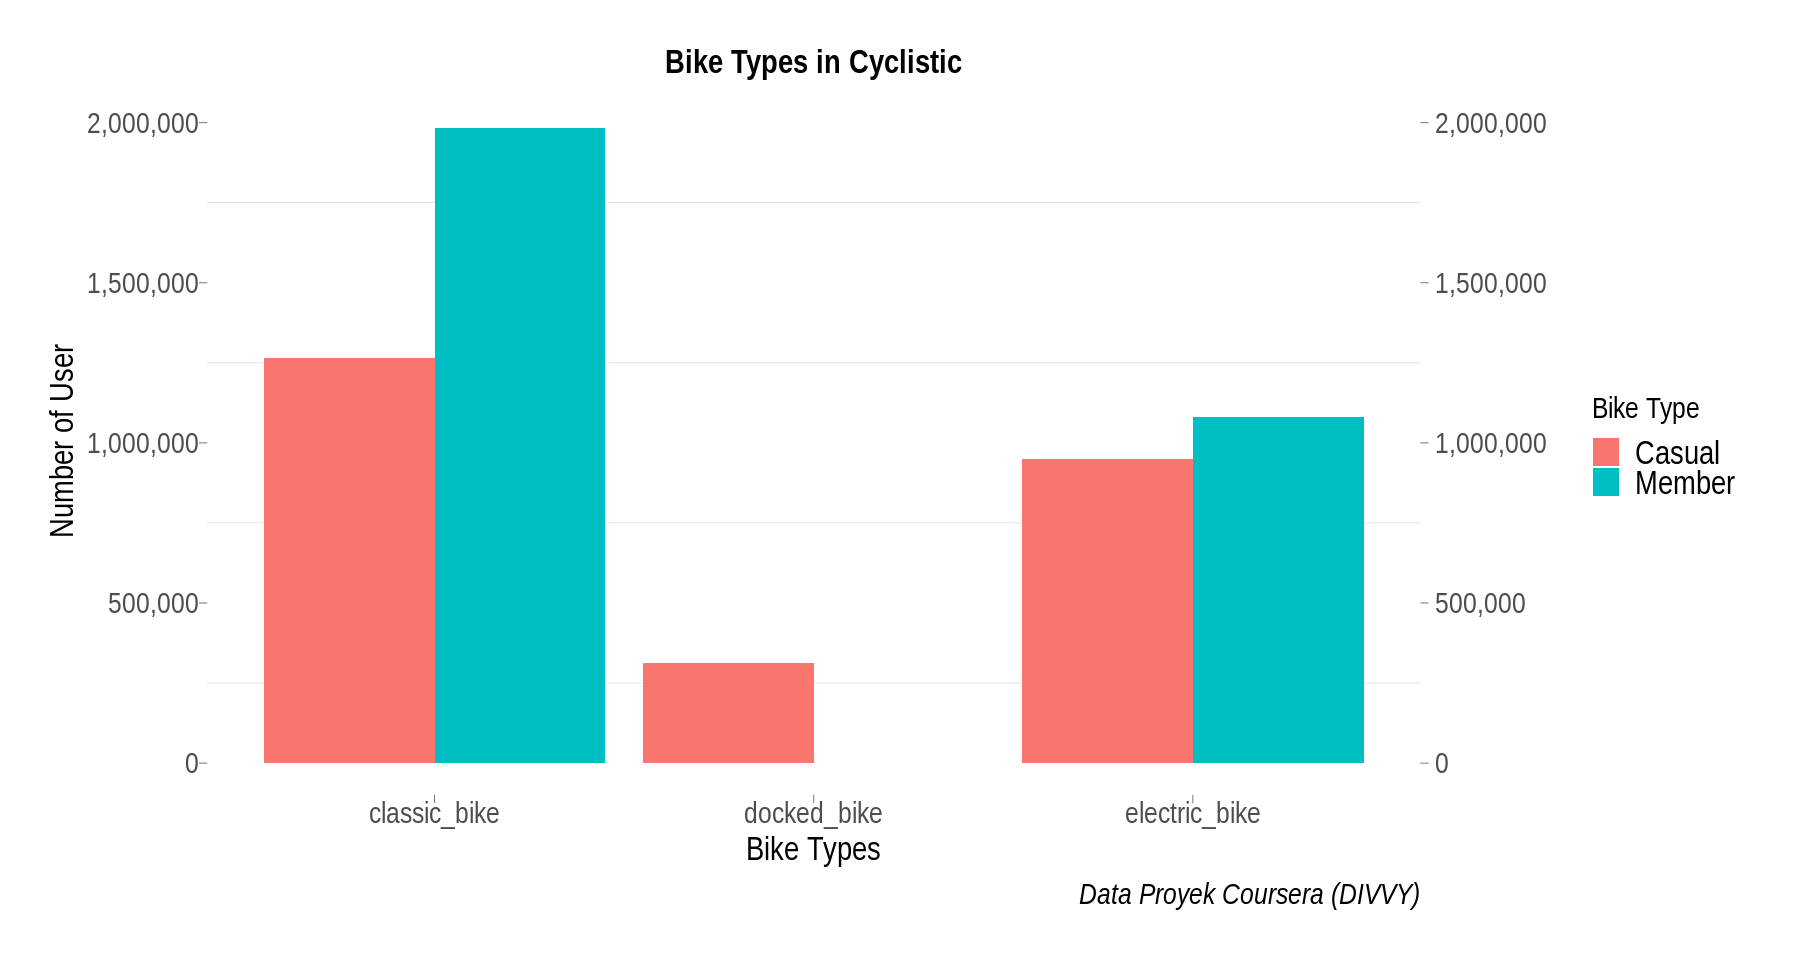

In [44]:
#Visualisai Data Sepeda
options(repr.plot.width = 15, repr.plot.height = 8 )
plot_bike <- ggplot(data_bike, aes(x = bike_type, y = n, fill = customer_type))+
  geom_col(stat = "indentity", position = position_dodge())+
  scale_y_continuous(sec.axis = dup_axis(name = NULL),labels = comma)+
  scale_color_manual(values = c(
  "casual" = "red",
  "member" = "green"),
  labels = c("Casual","Member"))+
  scale_fill_discrete(name = "Bike Type", labels = c("Casual", "Member"))+
  labs(
  x = "Bike Types",
  y = " Number of User",
  title = " Bike Types in Cyclistic ",
  caption = "Data Proyek Coursera (DIVVY)"
 )+
   theme_minimal()+
   theme_ipsum(
   base_size = 18,
   plot_title_size = 20,
   grid = "y",
   ticks = TRUE
   )+
   theme(
   plot.title = element_text(hjust = 0.5),
   legend.position = "right",
   legend.text = element_text(size = 20),
   axis.title.x = element_text(size = 20, hjust = 0.5),
   axis.title.y = element_text(size = 20, hjust = 0.5),
   plot.caption = element_text(size = 18)
   )
   
   print(plot_bike)
  

Langkah 6: Bertindak 

*   Hasil Analisis
*   Rekomendasi 



Hasil Analisis


1.   Berdasarkan data member, pengguna casual dalam satu tahun sebesar 2.528.664 dan pengguna tahunan(member) lebih besar dari pengguna casual yaitu sebesar 3.065.746.
2.   Berdasarkan data bulanan : 

*   pengguna casual mengalami flutuasi(keadaan naik dan turun) dan memiliki trend ke arah positif(kenaikan) pada tahun 2021. Pengguna casual mengalami kenaikan pada bulan maret hingga puncaknya pada bulan juli. Bulan agustus hingga desember pengguna casual mengalami penurunan. Punurunan terbesar terjadi pada bulan november.  

*   Pengguna anggota tahunan (member) mengalami fluktuasi,namun cenderung stabil dan memiliki trend ke arah postif. pengguna angota tahunan ter tinggi terjadi pada bulan agustus dan penurunan terbesar pada bulan november. Kenaikan dan Penurunan yang terjadi pada kedua tipe konsumen dapat disebabkan oleh berakhirnya musim dingin serta masuknya musim dingin. 



3.    Berdasarkan data mingguan dan data waktu :


*   Pengguna casual menggunakan Cyclistic untuk hiburan atau mengisi waktu luang. Hal ini dapat dilihat pada data mingguan dan data waktu, pengguna casual tertinggi terjadi pada hari jumat hingga minggu sekitar pukul 17.00-19.00 pada hari jumat dan pukul 10.00 -20.00 pada hari sabtu dan minggu. 
*   Pengguna anggota tahunan(member) menggunakan Cyclistic untuk bekerja atau beraktifitas sehari - hari . Hal ini dapat dilihat dari data mingguan dan data waktu, pengguna member cenderung stabil di setiap harinya, dan waktu yang banyak di gunakan terjadi pada hari senin - jumat pada pukul 7.00 - 8.00 dan pada pukul 16.00-19.00.  

4. Berdasarkan data durasi, maksimal waktu pengguna casual adalah 9 hari, sedangkan member adalah 2 hari. minimal menggunakan Cyclistic pengguna casual selama 18 menit dan member selama 59 menit. Rata - rata pengguna casual selama 32 menit dan pengguna member selama 13 menit. 

5. Berdasarkan data tipe sepeda, Baik pengguna casual meupun pengguna member lebih menyukai tipe sepeda clasic dibandingkan tipe sepeda electric dan sepeda docked 

 


## Rekomendasi 

1. Sangat memungkinkan untuk mengubah keaggotaan pelanggan casual menjadi pelanggan tahunan (member) dengan melakukan promosi secara online melalui email pelanggan ataupun notifikasi di aplikasi Cyclistic pada pelanggan status pelanggan casual. Promosi ini dapat di lakukan pada hari jumat - minggu pada jam 9.00 - 20.000. ataupun Pada hari senin - kamis pada jam pulang kantor yaitu jam 16.00 - 20.000. Hal ini dikarena pada jam tersebut pelanggan casual aktif dalam menggunakan aplikasi Cyclistic. 

2. Cyclistic dapat memberikan potongan harga pada saat liburan musim panas. Untuk menarik pengguna casual lama mauapun baru agar menjadi pengguna tahunan atau member. 

3. Apabila Cyclistic ingin menambah armada, maka clasic bike adalah pilihan terbaik bagi kedua tipe konsumen. 

## Citasi 


*   R community.com
*   stackoverflow.com
*   statology.org
*   Qoura.com
*   Pratiwi Eka Puspita : https://namakutiwik.medium.com/use-r-kernel-in-google-colaboratory-b05b297038d
*   Run R in google colab : https://exsight.id/blog/2021/05/24/run-r-di-google-colab-ikuti-langkah-mudah-berikut/
*    Referensi project : https://medium.com/@Diaryofafemaleanalyst/google-data-analytics-capstone-project-cyclitic-bike-share-34e24a910cdd

